## Unit 3.3 &ndash; Unsupervised Learning

In unsupervised learning, we are faced with a different problem than in supervised learning. 
We have data with features (inputs) but no target values (outputs). 

Instead of exploring relationships between inputs and outputs like in supervised learning, we explore the structure of the data in more detail! 
Dimensionality reduction is a prime example of unsupervised learning. 
Say we have high-dimensional data, e.g., hundreds observables. 
Often, there is some overlap between the information in these observables such as in stock returns. 
Yet, financial theory teaches us that there are portfolios, i.e., combinations of stocks that capture major investment themes &ndash; and thus, for our understanding of what is happening in financial markets, we need not worry about all stocks but specific portfolios. 
Another example would involve US Treasury bond yields and US corporate bond yields. The latter is effectively the US Treasury bond yields plus a credit spread that investors demand buying these more risky securities. Therefore, various combinations of US Treasury bond yields and US corporate bond yields is more informative than the two data points independently! When faced with so many indicators, we ought to extract the essence of the information and figure out which indicators and their combinations matter.

Another example of unsupervised is clustering, also known as data segmentation. 
We want to group observations by similarity or dissimilarity.

In both of these two examples, we do not presume a correct way to reduce the dimensionality or group the data. Instead, we provide some boundary conditions or parameters. In the case of dimensionality reduction, we may specify the number of dimensions or the minimum information content retained. In the case of data segmentation, we may specify the number of groups into which separate the data.

### Table of Contents

* [Principal Component Analysis](#PCA)
* [Clustering](#Clusters)


### Principal Component Analysis <a name="PCA"></a>

PCA is a tool to find structure in a data set by reducing the data to a "subspace" of lower dimension which explains much of the variance.

* Instead of tracking hundreds of stocks in the S&P 500, we extract the combination of stocks or portfolio that has the largest variance, i.e., captures most of the risk we are taking with any investment.
* Instead of tracking the returns of different Treasury bills, notes and bonds for different maturities (e.g., 1 month, 2 months, and so on until 30 years), we extract the term structure of interest rates, i.e., the shape of the yield curve.

We can illustrate the workings of PCA with a toy data set.

Consider the following 3-dimensional data set $Y_i = (y_{i,1}, y_{i,2}, y_{i,3})$ generated with mean ${\bf\mu}=(\mu_1, \mu_2,\mu_3)$ from a covariance matrix $\Sigma$.

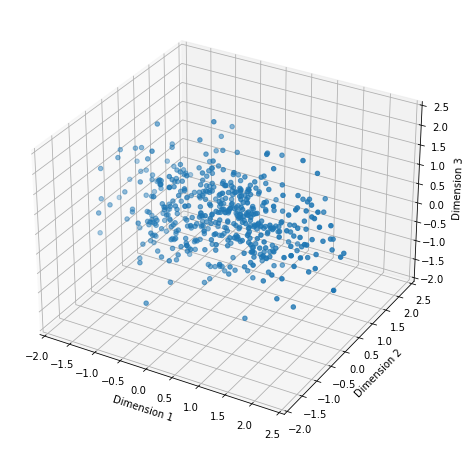

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu = np.array([0.1, 0.2, 0.3])
cov = [[ 0.840, 0.032, -0.064],
       [ 0.032, 0.100,  0.100],
       [-0.064, 0.100,  0.320]]

np.random.seed(587)
Y = np.random.multivariate_normal(mu, cov, 500)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y.T[0], Y.T[1], Y.T[2])
ax.set_xlim(-2, 2.5)
ax.set_xlabel("Dimension 1")
ax.set_ylim(-2, 2.5)
ax.set_ylabel("Dimension 2")
ax.set_zlim(-2, 2.5)
ax.set_zlabel("Dimension 3");

Note how the first dimension has the largest variation &ndash; after all, we have chosen that $\sigma_1^2 = \mathbf{\Sigma}_{11} =  0.840$ is the largest value.
The second dimension has very little spread, and the third dimension has some decent amount of spread.

If we look at the 2-dimensional projections of the data, we note that we get a different degree of richness, depending on which projection we are looking at.

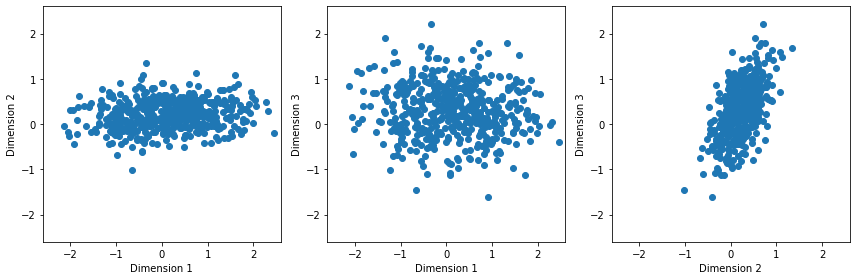

In [2]:
combos = [[0, 1], [0, 2], [1, 2]]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for combo, ax in zip(combos, axes):
    ix1, ix2 = combo
    ax.scatter(Y.T[ix1], Y.T[ix2])
    ax.set_xlim(-2.6, 2.6)
    ax.set_ylim(-2.6, 2.6)
    ax.set_xlabel("Dimension {}".format(ix1+1))
    ax.set_ylabel("Dimension {}".format(ix2+1))

plt.tight_layout()

* Looking at the graph from dimension 3, i.e., from top down onto the 3D graph, we see a lot of variation along dimension 1 and much less variation among dimension 2. We will not be able to distinguish well between data points.
* Looking at the graph from dimension 2, i.e., from right to left in the 3D graph, we see a lot of variation among both dimensions. We will be able to distinguish the points very well!
* Looking at the graph from dimension 1, i.e., from front to back in the 3D graph, we see some variation among dimension 3 and much less variation among dimension 2. Further, there seems to be some slight correlation as the points tend to go from bottom left to top right. We will not be able to distinguish well between data points.

Any of these perspectives completely erases the richness of one dimension. 
In the first case, we lose all information that is encoded among dimension 3, for example.
Such a loss of information is not acceptable. 
It is akin to having the return data of three different stocks and simply ignoring one of them in building a portfolio.

We can quantify the loss by looking into how much variance is stored in each dimension.

In [3]:
np.var(Y, axis=0, ddof=1)

array([0.80292806, 0.10502662, 0.34120574])

In [4]:
np.var(Y, axis=0, ddof=1) / np.sum(np.var(Y, axis=0, ddof=1))

array([0.64277417, 0.08407777, 0.27314806])

* Among dimension 1, we have 0.80 units of variance of 64.3% of the entire variance.
* Among dimension 2, we have 0.11 units of variance of 8.4% of the entire variance.
* Among dimension 3, we have 0.34 units of variance of 27.3% of the entire variance.

Therefore, in the best case scenario, we are losing 8.4% of the variation in the data points by ignoring dimension 2.

Instead, we want to find combinations of the dimensions that maintain information.
Here PCA offers a way forward!
It identifies the linear combinations of the dimensions that, in order, have the highest variance. 
The first principal component has the most variation among any possible linear combinations.
The second principal component has the most variation among another possible linear combination that is not at all captured by the first principal component, and so on.

PCA is a part of the `sklearn` module, contained in the `decomposition` submodule.
We initialize the PCA with the number of components we want to keep.
(This number must be smaller or equal to the dimensions of the data, here 3.)
For our demo, we keep all three components so we can explore the behavior.

In [5]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(Y)

PCA(n_components=3)

Using the attributes `explained_variance_` and `explained_variance_ratio_`, we can find out how much of the variance our principal components explain:

In [6]:
pca.explained_variance_

array([0.80790906, 0.38433754, 0.05691383])

In [7]:
pca.explained_variance_ratio_

array([0.64676165, 0.30767668, 0.04556167])

If we transform our data into the principal components and only keep the first one, we are able to capture 64.7% of the variance in the data! 
The second component captures 30.8% of the data, and the third component captures 4.6% of the data.
(The percentages do not add up to 100% due to rounding.)

In other words, if we reduce our data with the principal component analysis instead of blindly throwing out one dimension, we are only losing 4.6% of the variation in the data.

In our example, the impact does not seem to be significant; however, in practical examples with dozens or hundreds of features or dimensions, proper dimensionality reduction is absolutely crucial.

Let us revisit our data set from the previous unit on supervised learning for another demonstration!
We begin with our preprocessing. (Check what happens if you don't preprocess &ndash; the PCA looks for the column with the largest variance which is *Q* and puts an undue weight on it.)

In [8]:
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./Data/3_Firm_Target.csv", index_col=0)

wins_columns = ['NI_TA', 'DEP_TA', 'FA_TA', 'RD_TA', 'Q']
winsorized_values = df.loc[:, wins_columns].apply(
    winsorize, args=([0.025, 0.025],))

df.loc[:, wins_columns] = winsorized_values

data_columns = ["MDR", "Ind_Median_MDR", "Log_TA", "NI_TA",
                "DEP_TA", "FA_TA", "RD_TA", "Rated", "Q"]

scaler = StandardScaler()
transformer = scaler.fit(df.loc[:, data_columns])
scaled_values = transformer.transform(df.loc[:, data_columns])

df.loc[:, data_columns] = scaled_values

X = df.loc[:, ["MDR", "Ind_Median_MDR", "Log_TA", "NI_TA",
               "DEP_TA", "FA_TA", "RD_TA", "Rated", "Q"]]

target_pca = decomposition.PCA(n_components=len(X.columns))
target_pca.fit(X)

target_evr = target_pca.explained_variance_ratio_
target_evr_cum = np.cumsum(target_pca.explained_variance_ratio_)

for i in range(len(X.columns)):
    print("PCA {} explains {:.1f}% of the variance, cumulative {:.1f}%".
          format(i+1, 100*target_evr[i], 100*target_evr_cum[i]))

PCA 1 explains 27.3% of the variance, cumulative 27.3%
PCA 2 explains 15.8% of the variance, cumulative 43.1%
PCA 3 explains 13.8% of the variance, cumulative 56.8%
PCA 4 explains 10.8% of the variance, cumulative 67.6%
PCA 5 explains 9.2% of the variance, cumulative 76.9%
PCA 6 explains 7.6% of the variance, cumulative 84.5%
PCA 7 explains 6.9% of the variance, cumulative 91.4%
PCA 8 explains 4.4% of the variance, cumulative 95.8%
PCA 9 explains 4.2% of the variance, cumulative 100.0%


The first four components of the PCA explain a cumulative 67.6% of the variance! PC 1 alone captures more than a quarter of the variance.
Even though we may have nine features in the data, probably five to seven will be sufficient to capture the variation in firm characteristics.
If we wanted to train a sophisticated machine learning model (like we outline in the previous unit), this would be a necessary first step so the algorithm does not learn based on redundancies!

What are these first four components that make up over two thirds of the variation?
We can access the coefficients, telling us how PC 1 through 4 assemble the original variables.

In [9]:
target_pca_df = pd.DataFrame(data=target_pca.components_[0:4],
                             index=["PC 1", "PC 2", "PC 3", "PC 4"],
                             columns=X.columns)

target_pca_df

,MDR,Ind_Median_MDR,Log_TA,NI_TA,DEP_TA,FA_TA,RD_TA,Rated,Q
PC 1,-0.381205,-0.341077,-0.315338,-0.389855,-0.047744,-0.379003,0.490127,0.015160,0.317092
PC 2,0.084380,0.045862,-0.114422,-0.352489,0.710859,0.504941,0.167259,-0.246231,0.067410
PC 3,-0.384884,-0.405760,0.523556,0.364772,0.130346,0.098062,-0.080333,-0.354862,0.347948
PC 4,0.316021,0.212422,0.060939,-0.183939,-0.312182,-0.187548,0.100460,-0.819540,0.055594


(Note that the sign of the numbers in the principal components is arbitrary, i.e., we could multiply each row with $-1$ and it would not change the meaning.)

Let's interpret our findings.

* PC 1, which captures the largest variation of firms, puts relatively large weights on MDR, the size of the firm, its profitability, its fixed assets and its R&D spending.
* PC 2 puts large weights on the depreciation and fixed asset ratios.
* PC 3 puts large weights on the size of the firm and its MDR.
* PC 4 puts large weights on whether the firm is rated or not.

Naturally, these interpretations are imperfect, but they allow us to explore what is captured by the principal components.

### Clustering <a name="Clustering"></a>

Another very important unsupervised learning method is clustering, in which we group the data into a number of clusters based on their features.
*k-means* clustering is one of the most commonly used methods for this task, and we will apply it to our firm data set. *k-nearest neighbor* is another, albeit simpler, method which in design is very similar to *k-means*.

*k-means* clustering is an iterative procedure working in the following way:

1. We take initial guesses at initial cluster centers, akin to "the representative firm" in our case study for a given cluster.
2. We allocate each firm to its closest cluster center and label it accordingly.
3. We update our best guess to what is "the representative firm" given the firms associated with a given cluster.
4. We repeat steps 2 and 3 until there are no more changes, i.e., we have found cluster centers and allocated all firms to them without causing changes in "the representative firm".

Recall our winsorized and scaled data set:

In [10]:
X.describe()

,MDR,Ind_Median_MDR,Log_TA,NI_TA,DEP_TA,FA_TA,RD_TA,Rated,Q
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,-1.007250e-16,9.503509e-17,2.139816e-16,-3.927414e-18,5.651035e-17,1.409983e-16,4.107825e-17,-5.557776e-16,9.769963e-18
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.061587e+00,-1.675803e+00,-2.581284e+00,-3.701754e+00,-1.352252e+00,-1.153383e+00,-5.566262e-01,-1.922196e+00,-7.383450e-01
25%,-8.409065e-01,-6.508863e-01,-7.469868e-01,-5.998411e-02,-7.108418e-01,-8.022545e-01,-5.566262e-01,5.202384e-01,-5.257675e-01
50%,-2.665525e-01,-2.850059e-01,-1.791128e-03,2.818195e-01,-2.107441e-01,-3.156130e-01,-5.466202e-01,5.202384e-01,-3.179462e-01
75%,5.668956e-01,2.512782e-01,6.754664e-01,5.237033e-01,4.552135e-01,5.891039e-01,6.991135e-02,5.202384e-01,4.363165e-02
max,3.476139e+00,3.570764e+00,3.028820e+00,1.221457e+00,3.099167e+00,2.446102e+00,3.686737e+00,5.202384e-01,4.407697e+00


We are looking at the different groupings based on the numbers of clusters. 
To this end, we create multiple models and predictions of the cluster association.

In [11]:
from sklearn.cluster import KMeans

for n_clusters in range(2, 11, 2):
    kmeans = KMeans(n_clusters=n_clusters)
    model = kmeans.fit(X)
    
    X.loc[:, "cluster_{}".format(n_clusters)] = model.predict(X)
    
X.head()

,MDR,Ind_Median_MDR,Log_TA,NI_TA,DEP_TA,FA_TA,RD_TA,Rated,Q,cluster_2,cluster_4,cluster_6,cluster_8,cluster_10
0,0.618672,-1.017397,0.084559,-1.023297,-0.338421,0.929174,-0.556626,-1.922196,-0.562421,1,1,4,0,6
1,-1.060484,-1.473450,-0.647716,-0.415172,-0.846778,-0.814580,2.514988,-1.922196,4.407697,0,3,3,3,9
2,-0.951421,-1.675803,0.656452,1.179735,0.486792,0.495632,-0.299614,0.520238,1.882612,1,2,1,7,5
3,0.017562,1.395297,0.393303,1.051454,0.349101,2.446102,-0.556626,-1.922196,0.036742,1,1,4,0,6
4,-0.019493,-1.041965,-0.440904,-0.227405,-0.729565,-0.842836,-0.556626,0.520238,-0.566402,1,2,1,1,0


For example, the first firm would be put into cluster 1 if we had 2 or 4 clusters, it would be put into cluster 4 if we had 6 clusters, it would be put into cluster 0 if we had 8 clusters, and it would be put into cluster 6 if we had 10 clusters.

Note that the number of clusters has been entirely our choice! 
We can explore and try to recreate how the clusters are formed. 
In other words, what variables determine in which cluster a firm ends up?
Let's do a demonstration for our 4-cluster example.

Limited by a two-dimensional screen, let's go through the scatter plots of all variable pairs we have one by one.

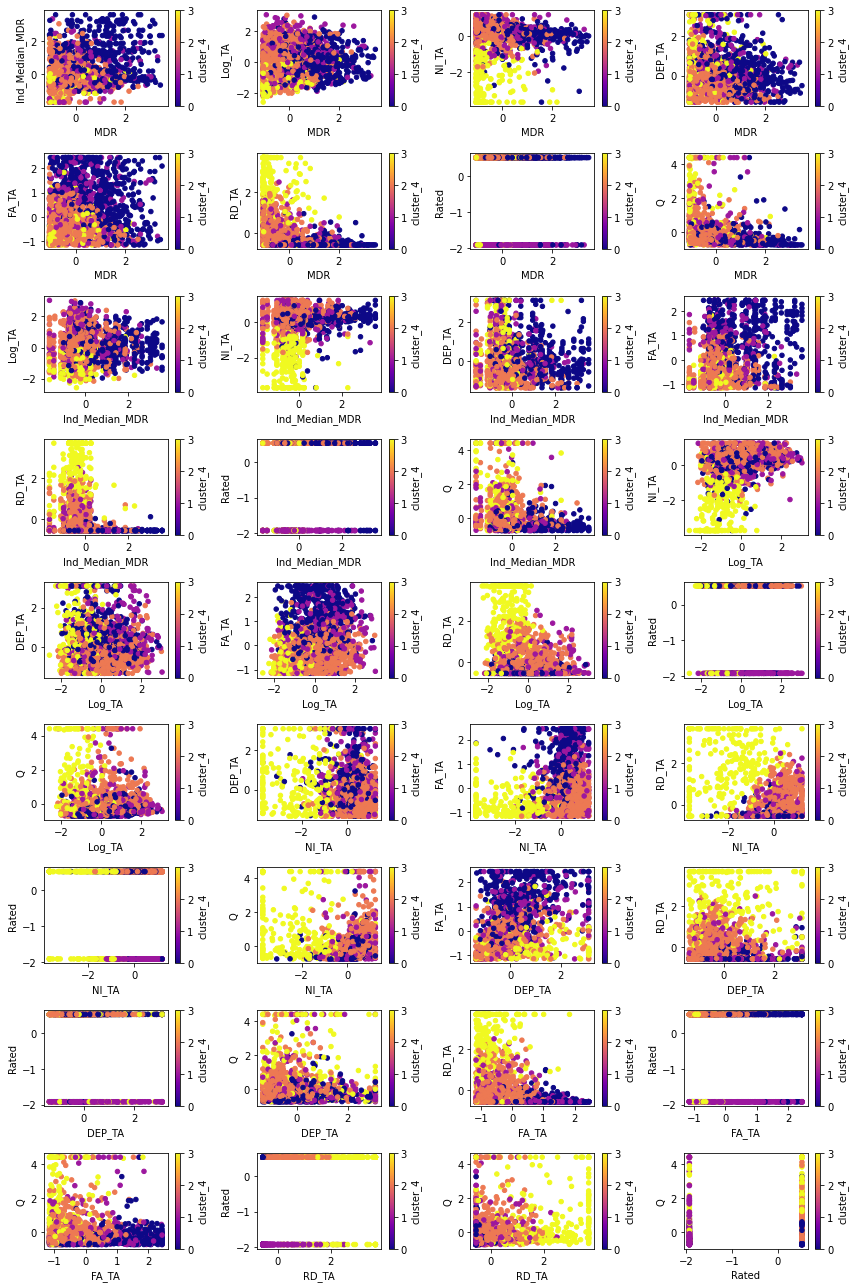

In [12]:
var_combos = [(data_columns[i], data_columns[j]) 
              for i in range(len(data_columns)) 
              for j in range(i+1,len(data_columns))]

fig, axes = plt.subplots(9, 4, figsize=(12, 18))

for var_combo, ax in zip(var_combos, axes.reshape(-1)):
    x, y = var_combo
    X.plot.scatter(x=x, y=y, c="cluster_4", ax=ax, cmap="plasma")
    
plt.tight_layout()

Let's zoom into some of these graphs that are more informative!

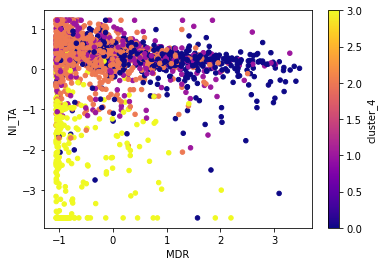

In [13]:
X.plot.scatter(x="MDR", y="NI_TA", c="cluster_4", cmap="plasma", sharex=False);

Apparently, cluster 3 distinguishes itself by, among other things, having low profitability and a low market-debt ratio, while cluster 2 has a higher profitability and a low market-debt ratio.

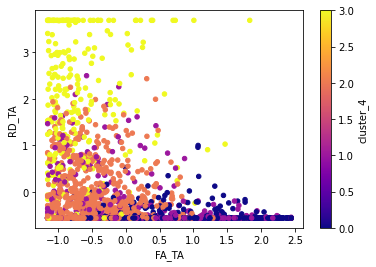

In [14]:
X.plot.scatter(x="FA_TA", y="RD_TA", c="cluster_4", cmap="plasma", sharex=False);

Similarly, if we look at the research expenditures and the fixed assets, firms in clusters 2 and 3 distinguish themselves by having low and high R&D spending, respectively, and rather low fixed assets.

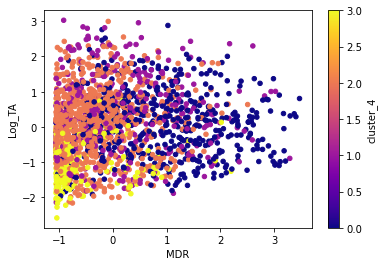

In [15]:
X.plot.scatter(x="MDR", y="Log_TA", c="cluster_4", cmap="plasma", sharex=False);

Firms in cluster 0 appear to have relatively large market-debt ratios and are of average size, firms in cluster 1 appear to be very similar in these dimensions to firms in cluster 0.
Firms in cluster 2 tend to be larger firms with low market-debt ratios, and firms in cluster 3 tend to be smaller firms with low market-debt ratios.

Findings from cluster analysis like this one can inform further research, for they are mostly exploratory in nature.
As mentioned above, the ideal number of clusters is an a priori unknown number in our analysis.
Researchers have proposed the elbow method or gap statistics to identify a preferable cut-off.
These measures, however, are beyond the scope of this self-paced lab and simply serve as a reminder that we cannot arbitrarily choose how many clusters we have the algorithm form. 
Our input should depend on the data or &ndash; if appropriate &ndash; on some theoretical background or narrative.